# Br41n.io hackaton

Data visualization

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import mne

from scipy.io import loadmat
from mne.io import RawArray
from mne import create_info

%gui qt
%matplotlib qt

## initialisation of the variables

In [54]:
s01 = loadmat('dataset/s01.mat')
eeg_s01 = s01['eeg']
value = eeg_s01[0,0]

srate = value['srate'][0,0]
n_trials = value['n_imagery_trials'][0,0]

bad_trials = value['bad_trial_indices']
event_onset = value['imagery_event'][0]
senloc = value['senloc']

rest_signal = value['rest']
imagery_left = value['imagery_left']

npnts = len(imagery_left[0])
timevec = np.arange(0, npnts)/srate

ch_to_keep = ['Cz', 'FC2', 'CP2', 'C4', 'FC6', 'CP6', 'T8']
ch_to_keep_index = [41, 43, 45, 47, 49, 53, 55]

plt.plot(timevec, imagery_left[47])

## mne object creation

In [64]:
ch_names = mne.channels.make_standard_montage('biosemi64').ch_names
raw_array = RawArray(imagery_left[ch_to_keep_index], info=create_info(sfreq=srate, ch_types='eeg', ch_names=ch_to_keep))

montage = {key:value for key, value in zip(ch_names, senloc)}
raw_array.set_montage(mne.channels.make_dig_montage(montage))

raw_array.notch_filter(60)
raw_array.filter(0.5, 60)
plt.plot(timevec, raw_array.get_data('Cz')[0])

Creating RawArray with float64 data, n_channels=7, n_times=358400
    Range : 0 ... 358399 =      0.000 ...   699.998 secs
Ready.
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 3379 samples (6.600 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- 

<ipython-input-64-a3bb577039fb>:5: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw_array.set_montage(mne.channels.make_dig_montage(montage))


- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3379 samples (6.600 sec)



## Adding annotations

<ipython-input-65-cc09f0727b97>:23: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_array.set_annotations(annotations)


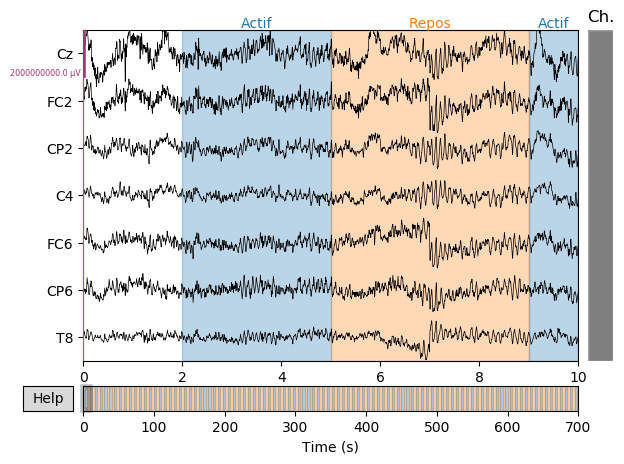

In [65]:
actif_onset_index = np.where(event_onset == 1)
actif_onsets = timevec[onset_index]
actif_duration = 3
actif_description = 'Actif'

repos_onsets = actif_onsets + actif_duration
repos_duration = 4
repos_description = 'Repos'

onsets = np.concatenate((actif_onsets, repos_onsets))
onsets = np.sort(onsets)

durations = []
descriptions = []
for i in range(0, int(len(onsets)/2)):
    durations.append(actif_duration)
    descriptions.append(actif_description)
    
    durations.append(repos_duration)
    descriptions.append(repos_description)
    
annotations = mne.Annotations(onsets, durations, descriptions)
raw_array.set_annotations(annotations)
raw_array.plot(scalings={'eeg':1000})

Effective window size : 4.000 (s)


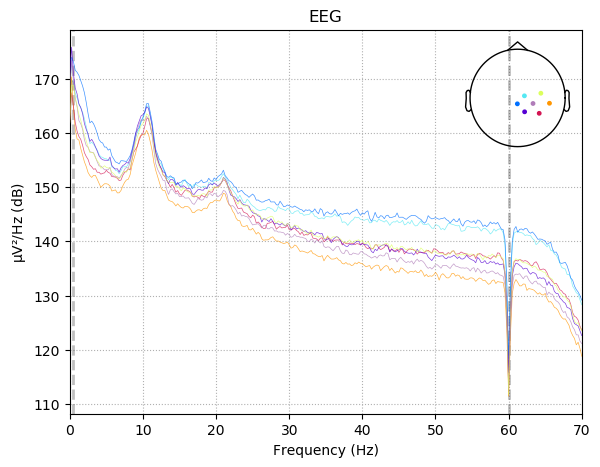

In [69]:
raw_array.plot_psd(fmax=70)

## Epoching

In [ ]:
events, annot_event_id = mne.events_from_annotations(raw_array, event_id={'Actif':0, 'Repos':1})